In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
import requests
import time
import random

In [115]:
data_dictionary = {
    "School": [],
    "State": [],
    "In_State_Tuition": [],
    "Control": [],
    "Student_Size": [],
    "Graduation_Debt": [],
    "Earning_6_years": []
}

page_num = 0
make_call = True

while make_call:

    base_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?"
    fields = "school.name,school.state,latest.school.degrees_awarded.predominant,latest.school.region_id,latest.school.degrees_awarded.highest,latest.cost.tuition.in_state,latest.school.ownership,latest.student.size,latest.aid.median_debt.completers.overall,latest.earnings.6_yrs_after_entry.median"
    api_request = f"https://api.data.gov/ed/collegescorecard/v1/schools.json?fields={fields}&api_key={config.API_KEY}&page={page_num}&_per_page=100"

    re = requests.get(api_request)
    data = re.json()

    if data['results'] != []:
        for school in data['results']:

            if (school['latest.school.region_id'] == 0 or 
                school['latest.school.region_id'] == 9 or
                school['latest.school.degrees_awarded.highest'] <= 2 or
                school['latest.school.degrees_awarded.predominant'] <= 2
                ):
                continue

            data_dictionary["School"].append(school['school.name'])
            data_dictionary["State"].append(school['school.state'])
            data_dictionary["Control"].append(school['latest.school.ownership'])
            data_dictionary["In_State_Tuition"].append(school['latest.cost.tuition.in_state'])
            data_dictionary["Student_Size"].append(school['latest.student.size'])
            data_dictionary["Graduation_Debt"].append(school['latest.aid.median_debt.completers.overall'])
            data_dictionary["Earning_6_years"].append(school['latest.earnings.6_yrs_after_entry.median'])

        page_num+=1

    else:
        make_call = False

    time.sleep(random.randint(0, 3))

In [116]:
tuition_df = pd.DataFrame(data_dictionary)
tuition_df.dropna(how='any', inplace=True)

# Aggregate numbers

In [117]:
# Earnings
tuition_df[['School', 'Earning_6_years']].sort_values(by='Earning_6_years', ascending=False).head(15)

,School,Earning_6_years
894,University of Health Sciences and Pharmacy in ...,122881.0
127,Harvey Mudd College,118953.0
708,Massachusetts Institute of Technology,118516.0
998,Albany College of Pharmacy and Health Sciences,117456.0
1908,Franklin W Olin College of Engineering,109372.0
1871,American University of Health Sciences,94180.0
1365,Carnegie Mellon University,92854.0
1797,Stanford University,91546.0
709,Massachusetts Maritime Academy,91156.0
1423,University of Pennsylvania,90173.0


In [123]:
# Graduation debt
tuition_df[['School', 'Graduation_Debt']].sort_values(by='Graduation_Debt', ascending=False).head(10).reset_index(drop=True)


,School,Graduation_Debt
0,Eagle Gate College-Murray,43021.0
1,Eagle Gate College-Layton,43021.0
2,The North Coast College,42785.0
3,Platt College-Aurora,42125.0
4,Martin University,42002.0
5,Provo College,41733.0
6,American University of Health Sciences,40326.0
7,Everglades University,38996.0
8,Boston Architectural College,37250.0
9,Design Institute of San Diego,36844.0


In [120]:
# Remove Strayer
tuition_df = tuition_df[~tuition_df['School'].str.startswith('Strayer')]

In [122]:
tuition_df[['School', 'Graduation_Debt']].sort_values(by='Graduation_Debt', ascending=False).head(10).reset_index(drop=True)


,School,Graduation_Debt
0,Eagle Gate College-Murray,43021.0
1,Eagle Gate College-Layton,43021.0
2,The North Coast College,42785.0
3,Platt College-Aurora,42125.0
4,Martin University,42002.0
5,Provo College,41733.0
6,American University of Health Sciences,40326.0
7,Everglades University,38996.0
8,Boston Architectural College,37250.0
9,Design Institute of San Diego,36844.0


# Transformations

## ROI

- To determine ROI we will define a new metric "**Debt Ratio**" defined as:
**Debt_Ratio** = Earnings / Debt


In [126]:
tuition_df['Debt_Ratio'] = (tuition_df['Earning_6_years'] / 3) / tuition_df['Graduation_Debt']

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_65455/2807346638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition_df['Debt_Ratio'] = (tuition_df['Earning_6_years'] / 3) / tuition_df['Graduation_Debt']


# Visualizations

### Public vs Private non-profit and private for-profit


[Text(0, 0, 'Public'),
 Text(1, 0, 'Private Non-Profit'),
 Text(2, 0, 'Private For-Profit')]

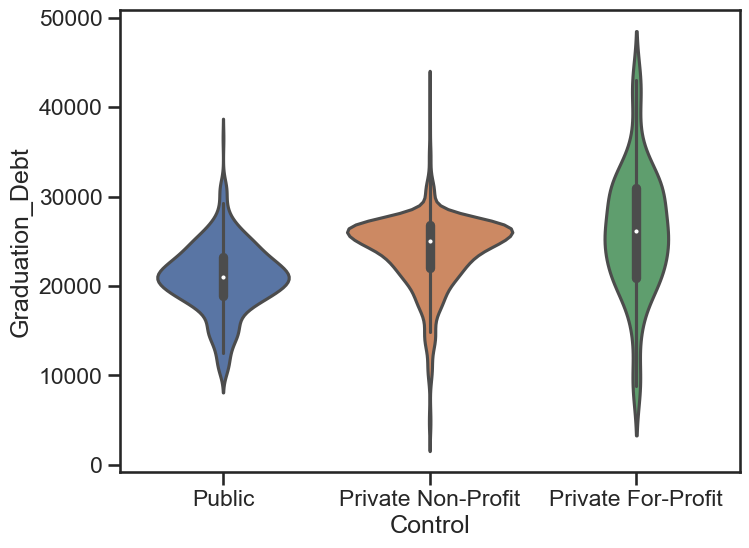

In [127]:
# Debt
labels = ["Public", "Private Non-Profit", "Private For-Profit"]

sns.set_context("talk")

fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(ax=ax, x=tuition_df['Control'], y=tuition_df['Graduation_Debt'])

ax.set_xticklabels(labels)


[Text(0, 0, 'Public'),
 Text(1, 0, 'Private Non-Profit'),
 Text(2, 0, 'Private For-Profit')]

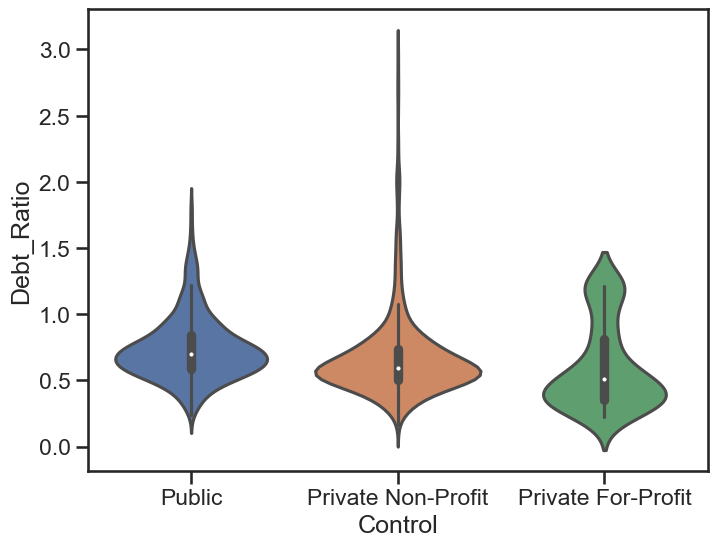

In [128]:
# Debt ratio
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(ax=ax, x=tuition_df['Control'], y=tuition_df['Debt_Ratio'])

ax.set_xticklabels(labels)


# Top 10 lists

In [131]:
# Earnings
tuition_df[['School', 'Earning_6_years']].sort_values(by="Earning_6_years", ascending=False).head(10).reset_index(drop=True)

,School,Earning_6_years
0,University of Health Sciences and Pharmacy in ...,122881.0
1,Harvey Mudd College,118953.0
2,Massachusetts Institute of Technology,118516.0
3,Albany College of Pharmacy and Health Sciences,117456.0
4,Franklin W Olin College of Engineering,109372.0
5,American University of Health Sciences,94180.0
6,Carnegie Mellon University,92854.0
7,Stanford University,91546.0
8,Massachusetts Maritime Academy,91156.0
9,University of Pennsylvania,90173.0


In [135]:
tuition_df[['School', 'Debt_Ratio']].sort_values(by="Debt_Ratio", ascending=False).head(10).reset_index(drop=True)

,School,Debt_Ratio
0,Berea College,2.984870
1,Princeton University,2.851195
2,Johns Hopkins University,2.728130
3,Massachusetts Institute of Technology,2.675063
4,Stanford University,2.542944
5,University of Health Sciences and Pharmacy in ...,2.306975
6,Albizu University-Miami,2.251333
7,Duke University,2.108513
8,Harvard University,2.076500
9,Rice University,2.064879
